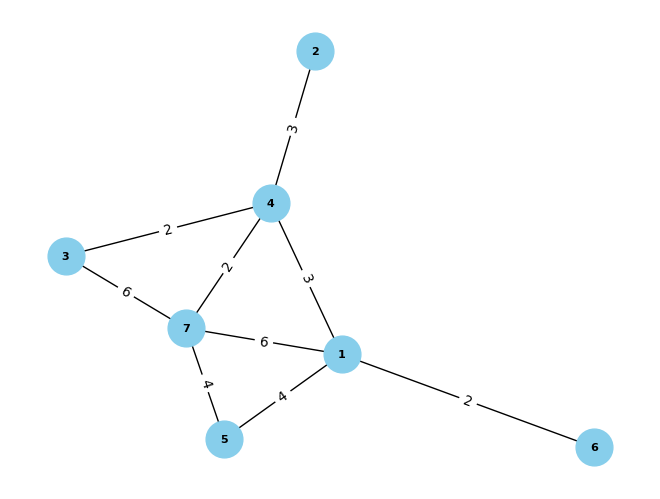

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Create a graph with 10 nodes
G = nx.Graph()

# Add nodes to the graph
nodes = 8

G.add_nodes_from(range(1, nodes))
G.add_edge(2, 4, weight=3)
G.add_edge(4, 3, weight=2)
G.add_edge(3, 7, weight=6)
G.add_edge(7, 1, weight=6)
G.add_edge(7, 4, weight=2)
G.add_edge(7, 5, weight=4)
G.add_edge(1, 6, weight=2)
G.add_edge(5, 1, weight=4)
G.add_edge(4, 1, weight=3)


'''for i in range(1, nodes - 1):
    print("i", i)
    for j in range(i + 1, nodes):
        print("j", j)
        # Add an edge with a random weight
        if random.choice([True, False]):
            weight = random.randint(1, nodes - 1)
            G.add_edge(i, j, weight=weight)
'''
# Plot the graph with weights
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)

# Add edge labels with weights
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

## 1. Weight matrix

In [2]:
weight_matrix = nx.adjacency_matrix(G, weight='weight').todense()
print(weight_matrix)

[[0 0 0 3 4 2 6]
 [0 0 0 3 0 0 0]
 [0 0 0 2 0 0 6]
 [3 3 2 0 0 0 2]
 [4 0 0 0 0 0 4]
 [2 0 0 0 0 0 0]
 [6 0 6 2 4 0 0]]


In [3]:
start_node = 4
shortest_paths = nx.shortest_path_length(G, source=start_node, weight='weight')
print(f"Shortest distances from node {start_node}: {shortest_paths}")

Shortest distances from node 4: {4: 0, 3: 2, 7: 2, 2: 3, 1: 3, 6: 5, 5: 6}


In [5]:
for node in list(G.nodes()):
    print("from node ", node)
    #print(nx.shortest_path_length(G, source=node, weight='weight'))
    my_dict = nx.shortest_path_length(G, source=node, weight='weight')      
    sorted_dict = {key: my_dict[key] for key in sorted(my_dict)}

    print(sorted_dict)

from node  1
{1: 0, 2: 6, 3: 5, 4: 3, 5: 4, 6: 2, 7: 5}
from node  2
{1: 6, 2: 0, 3: 5, 4: 3, 5: 9, 6: 8, 7: 5}
from node  3
{1: 5, 2: 5, 3: 0, 4: 2, 5: 8, 6: 7, 7: 4}
from node  4
{1: 3, 2: 3, 3: 2, 4: 0, 5: 6, 6: 5, 7: 2}
from node  5
{1: 4, 2: 9, 3: 8, 4: 6, 5: 0, 6: 6, 7: 4}
from node  6
{1: 2, 2: 8, 3: 7, 4: 5, 5: 6, 6: 0, 7: 7}
from node  7
{1: 5, 2: 5, 3: 4, 4: 2, 5: 4, 6: 7, 7: 0}


In [43]:
sorted_dict = {key: my_dict[key] for key in sorted(my_dict)}
print(sorted_dict)

{1: 5, 2: 5, 3: 4, 4: 2, 5: 4, 6: 7, 7: 0}


## 2. Adjscent matrix

In [44]:
adj_array = nx.adjacency_matrix(G, weight=None).toarray()
print(adj_array)

[[0 0 0 1 1 1 1]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1]
 [1 1 1 0 0 0 1]
 [1 0 0 0 0 0 1]
 [1 0 0 0 0 0 0]
 [1 0 1 1 1 0 0]]


### Function 1: create matrix

In [45]:
import numpy as np

def create_time_matrix(net):
    
    num_nodes = len(net.nodes())
    times_array = np.zeros((num_nodes, num_nodes), dtype=float)

    for i, node in enumerate(net.nodes()):
        # Calculate shortest paths from the current node
        my_dict = nx.shortest_path_length(net, source=node, weight='weight')
        sorted_dict = {key: my_dict[key] for key in sorted(my_dict)}

        # Fill the corresponding row in the result array
        for j, target_node in enumerate(net.nodes()):
            
            times_array[i, j] = sorted_dict.get(target_node, float('inf'))
            
    return times_array

def infection_matrix(net):
    
    num_nodes = len(net.nodes())
    infection_array = np.zeros((num_nodes, num_nodes), dtype=float)

                
    return infection_array


## 1. Times array

In [46]:
# Print or use result_array as needed
times_array = create_time_matrix(G)

#infect arra
infect_array = infection_matrix(G)

## Function 2: Update time

In [73]:
def update_time(time_matrix, seed_node):
    
    values = 0
    track = np.array([seed_node - 1])
    for _ in range(time_matrix.shape[0]):
        try:
            # What was the min value of the arrange greater than 0 (it-self)--> faster transmittion
            min_value = np.min(times_array[(seed_node - 1), times_array[(seed_node - 1), :] > values])
            values = min_value

            # Index
            # find the array of indeces in the array with minimum values Nodes
            Nodes = np.where(times_array[(seed_node - 1), :] == min_value)[0]

            ##########################
            #Update the infection time
            ##########################
            update = times_array[Nodes, :] 
            update[update > 0] += min_value
            #add
            times_array[Nodes, :] = update
            
            track = np.append(track, [Nodes])
            
        except:
            break
            
    return times_array, track
    

In [74]:
update_time(times_array, 4)

(array([[ 0., 37., 36., 34., 35., 33., 36.],
        [37.,  0., 36., 34., 40., 39., 36.],
        [15., 15.,  0., 12., 18., 17., 14.],
        [11., 11., 10.,  0., 14., 13., 10.],
        [50., 55., 54., 52.,  0., 52., 50.],
        [43., 49., 48., 46., 47.,  0., 48.],
        [31., 31., 30., 28., 30., 33.,  0.]]),
 array([3, 2, 6, 0, 1, 5, 4]))

In [49]:
times_array = create_time_matrix(G)
infect_array = infection_matrix(G)

In [50]:
adj_array

array([[0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 0, 0]])

## 3. create prob array

In [51]:
np.random.seed(42)
nod_numbers = len(G.nodes())

probabilities = np.round(np.random.rand(nod_numbers, nod_numbers), decimals=2)
prob_array = np.where(adj_array == 1, probabilities, 0)

In [52]:
prob_array

array([[0.  , 0.  , 0.  , 0.6 , 0.16, 0.16, 0.06],
       [0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.52, 0.  , 0.  , 0.61],
       [0.14, 0.29, 0.37, 0.  , 0.  , 0.  , 0.51],
       [0.59, 0.  , 0.  , 0.  , 0.  , 0.  , 0.97],
       [0.81, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.03, 0.  , 0.26, 0.66, 0.31, 0.  , 0.  ]])

## 4. Create the stack

In [53]:
# Vertically stack the arrays
times_array = create_time_matrix(G)
stack = np.dstack((adj_array, 
                   times_array,
                   prob_array, 
                   infect_array))

In [57]:
stack[:,:,3]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [75]:
##########################
#Update the infection time
##########################
time_updated, track = update_time(stack[:,:,1], seed_node)


def infect_func(stack, track_nodes, time_update, p):
    p = p
    #update time
    stack[:,:,1] = time_update
    
    #infect
    for nod in track_nodes:
        #infection going on!
        infection_row = np.where(stack[nod, :, 2] >= p, 1, 0)
        stack[nod, :, 3] = infection_row
    return stack

In [76]:
h = infect_func(stack, track, time_updated, p = 0.2)

In [77]:
h.shape

(7, 7, 4)

In [59]:
stack[:,:,3]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]])

In [82]:
stack[:,:,1]

array([[0.000e+00, 6.000e+00, 5.000e+00, 3.000e+00, 4.000e+00, 2.000e+00,
        5.000e+00],
       [6.000e+00, 0.000e+00, 5.000e+00, 3.000e+00, 9.000e+00, 8.000e+00,
        5.000e+00],
       [2.049e+03, 2.049e+03, 2.048e+03, 0.000e+00, 2.052e+03, 2.051e+03,
        2.048e+03],
       [2.570e+02, 2.570e+02, 2.560e+02, 0.000e+00, 2.600e+02, 2.590e+02,
        2.560e+02],
       [4.000e+00, 9.000e+00, 8.000e+00, 6.000e+00, 0.000e+00, 6.000e+00,
        4.000e+00],
       [2.000e+00, 8.000e+00, 7.000e+00, 5.000e+00, 6.000e+00, 0.000e+00,
        7.000e+00],
       [2.049e+03, 2.049e+03, 2.048e+03, 0.000e+00, 2.052e+03, 2.051e+03,
        2.048e+03]])

In [60]:
stack[:,:,1]

array([[0.00000e+00, 6.00000e+00, 5.00000e+00, 3.00000e+00, 4.00000e+00,
        2.00000e+00, 5.00000e+00],
       [6.00000e+00, 0.00000e+00, 5.00000e+00, 3.00000e+00, 9.00000e+00,
        8.00000e+00, 5.00000e+00],
       [2.62145e+05, 2.62145e+05, 2.62144e+05, 0.00000e+00, 2.62148e+05,
        2.62147e+05, 2.62144e+05],
       [3.27690e+04, 3.27690e+04, 3.27680e+04, 0.00000e+00, 3.27720e+04,
        3.27710e+04, 3.27680e+04],
       [4.00000e+00, 9.00000e+00, 8.00000e+00, 6.00000e+00, 0.00000e+00,
        6.00000e+00, 4.00000e+00],
       [2.00000e+00, 8.00000e+00, 7.00000e+00, 5.00000e+00, 6.00000e+00,
        0.00000e+00, 7.00000e+00],
       [2.62145e+05, 2.62145e+05, 2.62144e+05, 0.00000e+00, 2.62148e+05,
        2.62147e+05, 2.62144e+05]])

In [53]:
stack[:,:,0]

array([[0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1.],
       [1., 1., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 0., 0.]])

In [61]:
update = stack[nod, :, 1] 
#update[update > 0] += int(min_value)

#add
#stack[Nodes, :, 1] = update

In [83]:
update

array([2049., 2049., 2048.,    0., 2052., 2051., 2048.])